In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import tensorflow as tf

In [7]:
path = r"/content/drive/MyDrive/ML_Workspace/Projects/Project-9 (Image Segmentation)/Water Bodies Dataset"

data = tf.keras.utils.image_dataset_from_directory(directory = path, image_size = (256, 256), batch_size = 6000, shuffle = False)

Found 5682 files belonging to 2 classes.


In [ ]:
for images, masks in data:
    X = images.numpy().astype("uint8")
    y = masks.numpy().astype("uint8")

print(X.shape, y.shape)

(5682, 256, 256, 3) (5682,)


In [ ]:
images = X[y == 0]
masks = X[y == 1]

print(images.shape, masks.shape)

(2841, 256, 256, 3) (2841, 256, 256, 3)


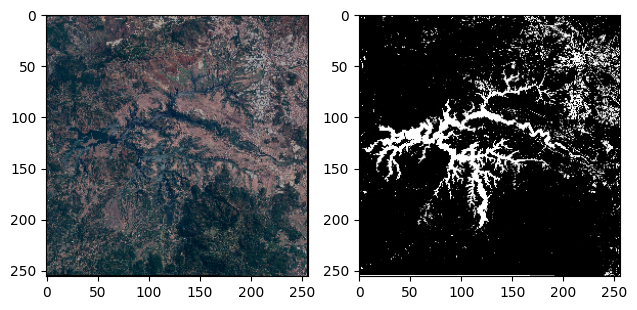

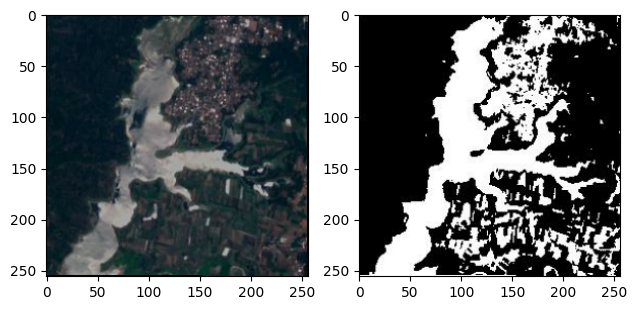

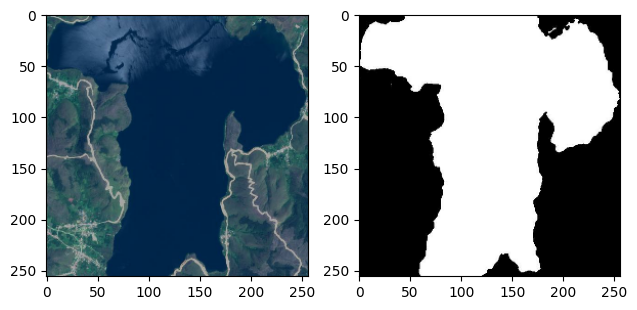

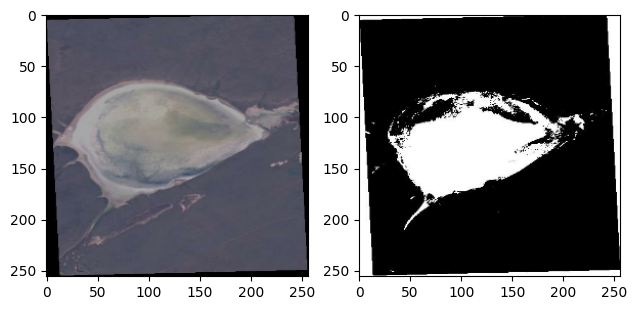

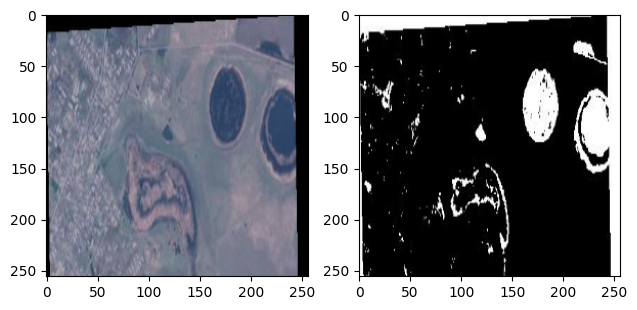

In [ ]:
for i in range(5):
    plt.subplot(1, 2, 1)
    plt.imshow(images[i])

    plt.subplot(1, 2, 2)
    plt.imshow(masks[i])

    plt.tight_layout()
    plt.show()

In [ ]:
X = np.zeros(shape = images.shape[:-1] + (1, ))
y = np.zeros(shape = masks.shape[:-1] + (1, ))

for i in range(X.shape[0]):
    X[i] = tf.image.rgb_to_grayscale(images[i])
    y[i] = tf.image.rgb_to_grayscale(masks[i])

print(X.shape, y.shape)

(2841, 256, 256, 1) (2841, 256, 256, 1)


In [ ]:
X = X / 255.0
y = y / 255.0

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)

(2272, 256, 256, 1) (569, 256, 256, 1)


In [ ]:
import tensorflow as tf

In [ ]:
inputs = tf.keras.layers.Input((256, 256, 1))

In [ ]:
c1 = tf.keras.layers.Conv2D(50, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Conv2D(50, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)

p1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(c1)

c2 = tf.keras.layers.Conv2D(100, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(100, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c2)

p2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(c2)

c3 = tf.keras.layers.Conv2D(150, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(150, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c3)

p3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(c3)

c4 = tf.keras.layers.Conv2D(200, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(200, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c4)

p4 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c5)

In [ ]:
u6 = tf.keras.layers.Conv2DTranspose(200, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(200, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Conv2D(200, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(150, (2,2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(150, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Conv2D(150, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(100, (2,2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(100, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(100, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(50, (2,2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(50, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(50, (3,3), activation='elu', kernel_initializer='he_normal', padding='same')(c9)

In [ ]:
output = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[output])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 50)         500       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 50)         22550     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 50)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=25)

Epoch 1/25


##Testing the model

In [8]:
import tensorflow

model = tensorflow.keras.models.load_model('/content/model.h5')

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
def predict_mask(model, image_array):
    y_pred = (model.predict(image_array) > 0.5).astype(int)
    return y_pred

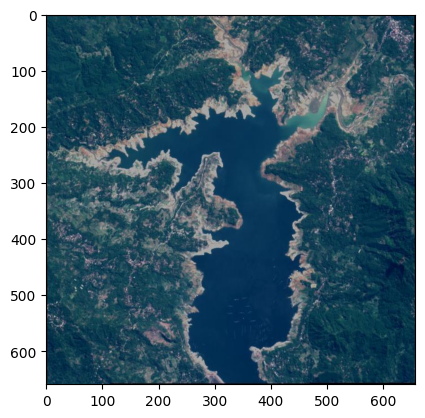

In [49]:
image = Image.open('/content/water_body_3.jpg')

plt.imshow(image)
image = image.resize((256, 256))
image = image.convert('L')
image_array = np.array(image)
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=-1)
image_array = np.expand_dims(image_array, axis=0)

In [50]:
predicted_mask = predict_mask(model, image_array)

1/1 [==============================] - 0s 264ms/step


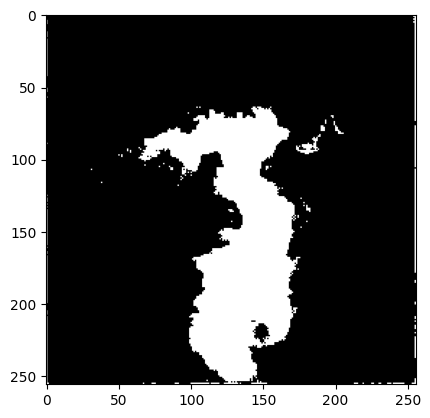

In [52]:
plt.imshow(np.squeeze(predicted_mask), cmap='gray')
plt.show()